In [1]:
#from random import sample
import numpy as np
import pandas as pd
#import networkx as nx
import sys, os, h5py
sys.path.append(os.path.abspath('/home/icb/samuele.firmani/EMOGI/EMOGI'))
import gcnPreprocessing
import gcnIO
#import matplotlib.pyplot as plt

proteome_multiscale_interactome = "/lustre/groups/crna01/datasets/arti_vir/input_data_transcriptome_proteome_effectome_2022_12_7_17_22/transcriptome-proteome-effectometranscriptome-proteome-effectome_abs_feature_values_False_are_missing_values_imputed_True_mulstiscale_interactome_imputed.h5"
effectome_no_imputed_features = "/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers/transcriptomics-proteomics_2022_9_12_19_12_no_imputed_features.h5"
effectome_non_zero_imputed_features = "/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers/transcriptomics-proteomics_2022_9_12_19_37_non_zero_imputed_values.h5"
transcriptomics_proteomics_zero_imputed_values = "/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers/transcriptomics-proteomics_2022_7_7_21_38_non_zero_imputed_values.h5"
transcriptomics_proteomics_non_zero_imputed_values = "/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers/transcriptomics-proteomics-effectome_2022_9_13_17_42_non_zero_imputed_values.h5"
transcriptomics_proteomics_no_imputed_values = '/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers/transcriptomics_proteomics_extended_positives_signed_weighted_connections_2022_4_12_23_14.h5'
boh = "/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers/transcriptomics-proteomics_2022_9_13_17_57.h5"
#data = gcnIO.load_hdf_data("/home/samuele/EMOGI_original_predictions/EMOGI_STRINGdb/STRINGdb_multiomics.h5")
#data = gcnIO.load_hdf_data("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers/transcriptomics-proteomics_2022_7_8_16_38_zero_imputed_values.h5")
data = gcnIO.load_hdf_data(proteome_multiscale_interactome)
#data = gcnIO.load_hdf_data('toy_example.h5')
network, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, node_names, feat_names = data
#features_df = pd.DataFrame(features, index=node_names[:, 1], columns=feat_names)

print(f"features dim: {np.shape(features)}")
print(f"number of nodes: {np.shape(y_train)[0]}")
print(f"number of connections {np.sum([network != 0])}")
print(f'network shape {np.shape(network)}')

#print(f"feature names {feat_names}")
n_positives = np.sum(y_train) + np.sum(y_test) + np.sum(y_val)
print(f"number of positives {n_positives}")
print(f"number of negatives {np.sum(train_mask) + np.sum(test_mask) + np.sum(val_mask) - n_positives}")

print(f"number of positive training labels {np.sum(y_train)}")
print(f"number of negative training labels {np.sum(train_mask) - np.sum(y_train)}")
print(f"number of positive test labels {np.sum(y_test)}")
print(f"number of negative test labels {np.sum(test_mask) - np.sum(y_test)}")
print(f"number of positive val labels {np.sum(y_val)}")
print(f"number of negative val labels {np.sum(val_mask) - np.sum(y_val)}")


features dim: (13594, 26)
number of nodes: 13594
number of connections 576248
network shape (13594, 13594)
number of positives 183.0
number of negatives 549.0
number of positive training labels 118.0
number of negative training labels 354.0
number of positive test labels 45.0
number of negative test labels 135.0
number of positive val labels 20.0
number of negative val labels 60.0


In [2]:
np.sum(network) == np.sum(network != 0)

True

# Testing functions

In [3]:
sys.path.append(os.path.abspath('/home/icb/samuele.firmani/GhostFreePro/GCN_experiment'))
sys.path.remove(os.path.abspath('/home/icb/samuele.firmani/EMOGI/EMOGI'))
import utils
import train


/home/icb/samuele.firmani/miniconda3/envs/pytorch_geometric/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_torch_tensor = train.import_artivir_dataset(proteome_multiscale_interactome)

In [5]:
data_torch_tensor

Data(edge_index=[2, 576248], edge_weights=[576248], x=[13594, 26], y=[13594], train_mask=[13594], test_mask=[13594], val_mask=[13594], num_node_features=26)

In [6]:
np.max(data_torch_tensor.edge_weights.tolist())

1.0

In [7]:
np.sum(data_torch_tensor.train_mask.tolist())

472

In [8]:
np.sum(data_torch_tensor.test_mask.tolist())

180

In [9]:
np.sum(data_torch_tensor.val_mask.tolist())

80

In [10]:
np.sum(data_torch_tensor.y[data_torch_tensor.train_mask].tolist())

118

In [11]:
np.sum(data_torch_tensor.y[data_torch_tensor.test_mask].tolist())

45

In [12]:
np.sum(data_torch_tensor.y[data_torch_tensor.val_mask].tolist())

20

- test cross validation splits k_fold(...) from utils

In [14]:
mask = data_torch_tensor.train_mask + data_torch_tensor.val_mask 
k_folds = utils.k_fold(mask, data_torch_tensor.y, 5)

In [40]:
np.sum(k_folds[4][0])

442

In [45]:
for cv_index in np.arange(5):
    print(f"number of positives in {cv_index} k-fold split in training set {np.sum(data_torch_tensor.y[k_folds[cv_index][0]].tolist())} on a total of {np.sum(mask[k_folds[cv_index][0]].tolist())} labeled samples")
    print(f"number of positives in {cv_index} k-fold split in test set {np.sum(data_torch_tensor.y[k_folds[cv_index][1]].tolist())} on a total of {np.sum(mask[k_folds[cv_index][1]].tolist())} labeled samples")

number of positives in 0 k-fold split in training set 110 on a total of 441 labeled samples
number of positives in 0 k-fold split in test set 28 on a total of 111 labeled samples
number of positives in 1 k-fold split in training set 110 on a total of 441 labeled samples
number of positives in 1 k-fold split in test set 28 on a total of 111 labeled samples
number of positives in 2 k-fold split in training set 111 on a total of 442 labeled samples
number of positives in 2 k-fold split in test set 27 on a total of 110 labeled samples
number of positives in 3 k-fold split in training set 111 on a total of 442 labeled samples
number of positives in 3 k-fold split in test set 27 on a total of 110 labeled samples
number of positives in 4 k-fold split in training set 110 on a total of 442 labeled samples
number of positives in 4 k-fold split in test set 28 on a total of 110 labeled samples


## More network checks

In [2]:
np.savetxt("input_network.txt",network)

In [5]:
type(np.shape(features)[1])

int

In [12]:
df_effectome = pd.read_csv("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/effectome.zip")

In [14]:
df_effectome.head()

,Viral protein,Unnamed: 1,Unnamed: 2,Host protein,Unnamed: 4,Unnamed: 5,Unnamed: 6,Changes vs. control overexpressed proteins,Unnamed: 8,Unnamed: 9
0,SARS-CoV-2,E,SARS_CoV2_E,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.647197,0.048104,0.309817
1,SARS-CoV-2,M,SARS_CoV2_M,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.594401,0.098502,0.321176
2,SARS-CoV-2,N,SARS_CoV2_N,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.669235,0.051251,0.298311
3,SARS-CoV-2,NSP1,SARS_CoV2_NSP1,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.142821,0.418099,0.205991
4,SARS-CoV-2,NSP10,SARS_CoV2_NSP10,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,-5.960447,0.001285,1.669647


In [20]:
df_effectome.columns

Index(['Viral protein', 'Unnamed: 1', 'Unnamed: 2', 'Host protein',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Changes vs. control overexpressed proteins', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')

In [23]:
covid_proteins_effectome = np.unique(df_effectome[df_effectome["Viral protein"] == "SARS-CoV-2"]["Unnamed: 1"].values)

In [24]:
len(covid_proteins_effectome)

24

In [3]:
df_interactome = pd.read_csv("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/viral_host_interactome.zip")

In [8]:
df_interactome.head(5)


,bait_organism,bait_name,gene_name,protein_description,majority_protein_acs,fold_change_log2,p_value,fold change_threshold
0,SARS-CoV,E,CEP170B,Centrosomal protein of 170 kDa protein B...,Q9Y4F5;Q9Y4F5-2;Q9Y4F5-3,7.201443,1.122881e-05,2
1,SARS-CoV,E,FAF2,FAS-associated factor 2,Q96CS3,2.711268,3.952059e-06,2
2,SARS-CoV,E,FAM241B,Protein FAM241B...,Q96D05;Q96D05-2,6.863366,3.467090e-04,2
3,SARS-CoV,E,HAVCR1,Hepatitis A virus cellular receptor 1,Q96D42,8.760684,1.294744e-68,2
4,SARS-CoV,E,NPLOC4,Nuclear protein localization protein 4 homolog...,Q8TAT6;Q8TAT6-2,8.854112,3.193217e-20,2


In [10]:
covid_proteins = np.unique(df_interactome[df_interactome["bait_organism"] == "SARS-CoV-2"]["bait_name"].values)

In [11]:
len(covid_proteins)

23

In [25]:
covid_proteins

array(['E', 'M', 'N', 'NSP1', 'NSP12', 'NSP13', 'NSP14', 'NSP15', 'NSP16',
       'NSP2', 'NSP3_macroD', 'NSP4', 'NSP6', 'NSP7', 'NSP8', 'NSP9',
       'ORF3', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'ORF9b', 'S'],
      dtype=object)

In [28]:
for item in covid_proteins_effectome:
    if item not in covid_proteins:
        print(item)

NSP10


In [22]:
np.linspace(0, 1, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

Text(0.5, 1.0, 'Original network weights distribution')

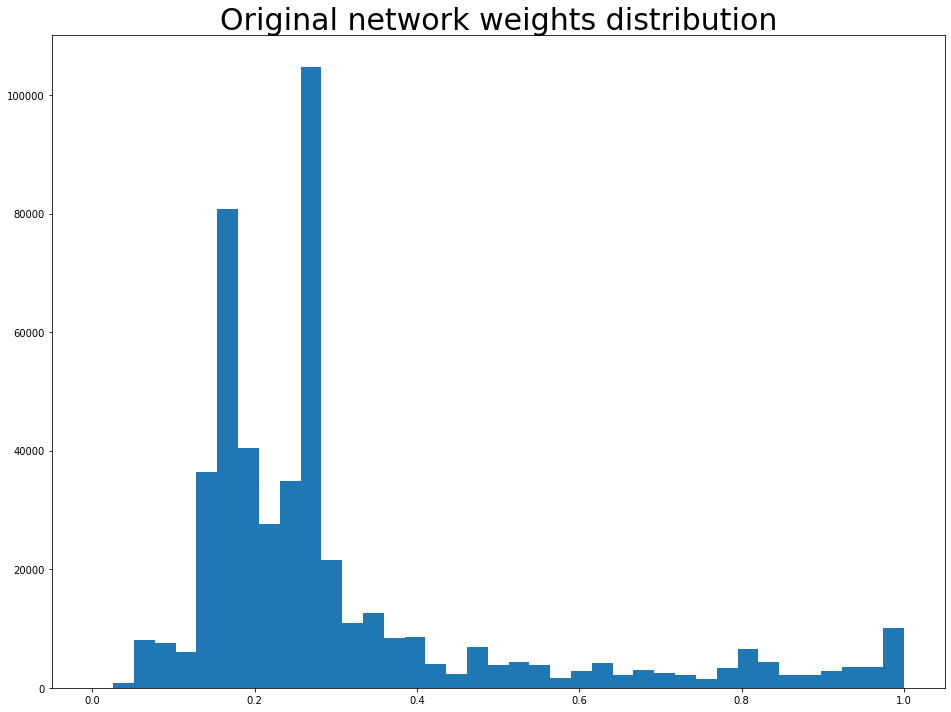

In [16]:
import matplotlib.pyplot as plt
from numpy import linspace
fig = plt.figure(figsize = (16,12))
plt.hist(network.flatten()[network.flatten() != 0.0], bins=linspace(0, 1, 40))
plt.title("Original network weights distribution", fontsize=30)

In [4]:
denoised_network = pd.read_csv("/home/samuele/GhostFreePro/data_preprocessing_pipeline/input_denoised_network.csv", header=None)
denoised_network = denoised_network.to_numpy()

In [7]:
np.sum(denoised_network > 0.0)/len(denoised_network.flatten())

0.023165840226152257

In [6]:
denoised_network[denoised_network < 0.02] = 0

In [8]:
np.sum(network > 0.0)/len(network.flatten())

0.017431273240766525

Text(0.5, 1.0, 'Denoised network weights distribution')

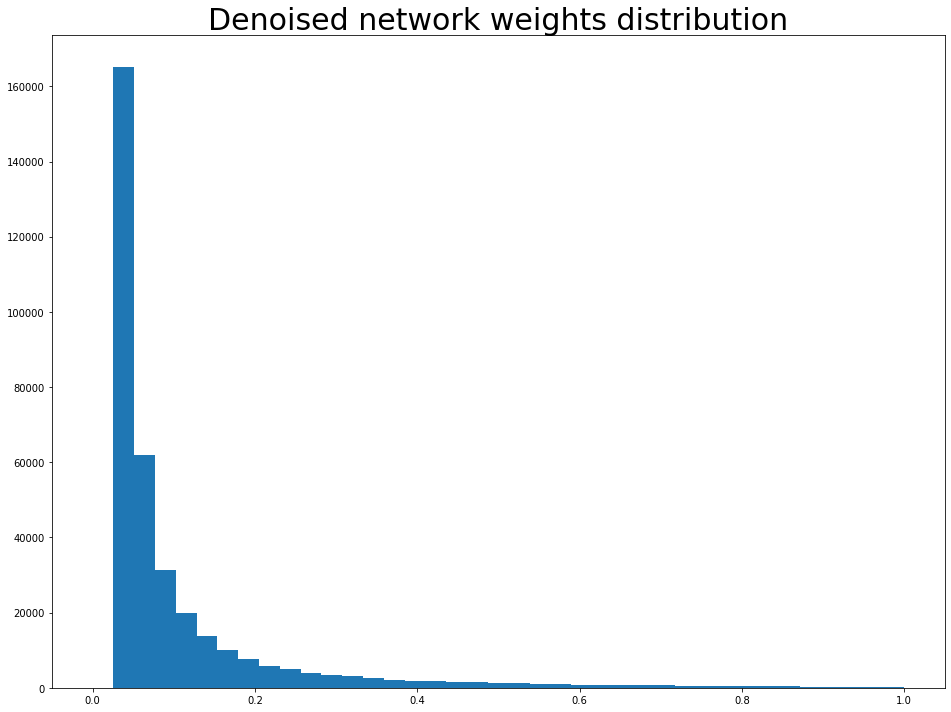

In [17]:
from numpy import size


fig = plt.figure(figsize = (16,12))
plt.hist(denoised_network.flatten()[denoised_network.flatten() > 0.03], bins=linspace(0, 1, 40))
plt.title("Denoised network weights distribution", fontsize=30)

In [37]:
np.max(denoised_network)

16.6541924805003

In [38]:
np.mean(denoised_network)

0.00536197564475447

In [68]:
from preprocessing_utils import create_hdf5_container

create_hdf5_container(denoised_network, features, node_names, feat_names, y_train, train_mask, y_test, test_mask, y_val, val_mask, container_name='denoised_network_tra_pro_eff_no_imputed_no_small_weights', container_data_path="/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers")

In [31]:
df_proteomics = pd.read_csv("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/proteome_cell_lines.zip")

In [32]:
df_proteomics.head()

,protein_id,gene_name,majority_protein_acs,protein_descriptions,is_viral,is_hit.SARS_CoV2@6h_vs_mock@6h,change.SARS_CoV2@6h_vs_mock@6h,fold_change_log2.SARS_CoV2@6h_vs_mock@6h,p_value.SARS_CoV2@6h_vs_mock@6h,sd_log2.SARS_CoV2@6h_vs_mock@6h,...,is_hit.SARS_CoV2@24h_vs_mock@24h,change.SARS_CoV2@24h_vs_mock@24h,fold_change_log2.SARS_CoV2@24h_vs_mock@24h,p_value.SARS_CoV2@24h_vs_mock@24h,sd_log2.SARS_CoV2@24h_vs_mock@24h,is_hit.SARS_CoV@24h_vs_mock@24h,change.SARS_CoV@24h_vs_mock@24h,fold_change_log2.SARS_CoV@24h_vs_mock@24h,p_value.SARS_CoV@24h_vs_mock@24h,sd_log2.SARS_CoV@24h_vs_mock@24h
0,1,AP3A_CVHSA,P59632,ORF3a protein,True,False,.,0.110758,0.959254,2.055675,...,False,.,-0.955256,0.643720,1.915425,True,+,16.375371,0.000000e+00,1.320221
1,2,NS6_CVHSA,P59634,ORF6 protein,True,False,.,-0.988130,0.798853,2.901308,...,False,.,1.642723,0.615620,2.960081,False,.,8.064727,8.093673e-15,1.879148
2,3,NS7A_CVHSA,P59635,ORF7a protein,True,False,.,-0.762484,0.733404,2.642092,...,False,.,-1.715602,0.505189,2.483555,True,+,9.931911,1.682568e-32,1.688428
3,4,ORF9B_CVHSA,P59636,ORF9b protein,True,False,.,0.231381,0.921533,2.116073,...,False,.,-0.819101,0.673767,1.826557,True,+,18.849566,0.000000e+00,1.269382
4,5,AAAS,Q9NRG9;Q9NRG9-2,Aladin,False,False,.,0.023011,0.543802,0.043377,...,False,.,0.013181,0.735691,0.041354,False,.,0.054026,2.657095e-01,0.047817


In [33]:
df_effectome = pd.read_csv("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/effectome.zip")

In [34]:
df_effectome = df_effectome.rename(columns={"Unnamed: 1": "viral_bait_name", "Changes vs. control overexpressed proteins": "median_log2", "Unnamed: 8": "p_value", "Unnamed: 9": "standard_dev_log2"})
df_effectome.head()

,Viral protein,viral_bait_name,Unnamed: 2,Host protein,Unnamed: 4,Unnamed: 5,Unnamed: 6,median_log2,p_value,standard_dev_log2
0,SARS-CoV-2,E,SARS_CoV2_E,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.647197,0.048104,0.309817
1,SARS-CoV-2,M,SARS_CoV2_M,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.594401,0.098502,0.321176
2,SARS-CoV-2,N,SARS_CoV2_N,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.669235,0.051251,0.298311
3,SARS-CoV-2,NSP1,SARS_CoV2_NSP1,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,0.142821,0.418099,0.205991
4,SARS-CoV-2,NSP10,SARS_CoV2_NSP10,MTARC1,Q5VT66;Q5VT66-2,NaN,NaN,-5.960447,0.001285,1.669647


In [61]:
import json

json_file = open("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/feature_dict_signed_value.json", "r")
features_dict = json.load(json_file) 
len(features_dict.keys())

5318

In [62]:
for i in range(2, 7):
    print(i)

2
3
4
5
6


In [35]:
len(df_effectome["Host protein"].unique())

7546

In [9]:
viral_proteins = df_effectome["viral_bait_name"].unique()
host_proteins = df_effectome["Host protein"].unique()

In [10]:
from feature_preselection_transcriptome_proteome import feature_fold_change_pvalue_combination

In [20]:
length = []
effectome_features_dictionary = {}
for host_protein in host_proteins:
    host_protein_feature_vector = []
    viral_proteins_tested_per_host_protein = df_effectome[df_effectome["Host protein"] == host_protein]
    for viral_protein in viral_proteins:
        fc_and_pval_per_viral_protein = viral_proteins_tested_per_host_protein[viral_proteins_tested_per_host_protein["viral_bait_name"] == viral_protein][["median_log2", "p_value"]].to_numpy()
        host_protein_feature_vector.append(np.mean([feature_fold_change_pvalue_combination(l2fc, pval, False) for l2fc, pval in zip(fc_and_pval_per_viral_protein[:,0], fc_and_pval_per_viral_protein[:,1])]))
    print(host_protein + " done!!!")
    effectome_features_dictionary[host_protein] = host_protein_feature_vector

MTARC1 done!!!
MTARC2 done!!!
MARCHF5 done!!!
MARCHF6 done!!!
A2M done!!!
AAAS done!!!
AACS done!!!
AADAT done!!!
AAGAB done!!!
AAK1 done!!!
AAMDC done!!!
AAMP done!!!
AAR2 done!!!
AARS done!!!
AARS2 done!!!
AARSD1 done!!!
AASDHPPT done!!!
AATF done!!!
ABCA3 done!!!
ABCB10 done!!!
ABCB5 done!!!
ABCB6 done!!!
ABCB7 done!!!
ABCB8 done!!!
ABCC1 done!!!
ABCC2 done!!!
ABCC3 done!!!
ABCC4 done!!!
ABCC5 done!!!
ABCD1 done!!!
ABCD3 done!!!
ABCD4 done!!!
ABCE1 done!!!
ABCF1 done!!!
ABCF2 done!!!
ABCF3 done!!!
ABCG2 done!!!
ABHD10 done!!!
ABHD11 done!!!
ABHD12 done!!!
ABHD14B done!!!
ABHD16A done!!!
ABHD17A done!!!
ABHD17B done!!!
ABHD2 done!!!
ABHD4 done!!!
ABHD5 done!!!
ABHD6 done!!!
ABI1 done!!!
ABI2 done!!!
ABL1 done!!!
ABL2 done!!!
ABLIM1 done!!!
ABR done!!!
ABRACL done!!!
ABRAXAS1 done!!!
ABRAXAS2 done!!!
ABT1 done!!!
ACAA1 done!!!
ACAA2 done!!!
ACACA done!!!
ACAD10 done!!!
ACAD11 done!!!
ACAD8 done!!!
ACAD9 done!!!
ACADM done!!!
ACADS done!!!
ACADSB done!!!
ACADVL done!!!
ACAP2 done!!!
AC

KeyboardInterrupt: 

In [24]:
# test
effectome_features_dictionary["ADGRG6"][3]

-0.0542566422982131

In [29]:
 fc_and_pval = df_effectome[df_effectome["Host protein"] == "ADGRG6"][["median_log2", "p_value"]].to_numpy()
 fc_and_pval[3] 
 feature_fold_change_pvalue_combination(fc_and_pval[3][0] , fc_and_pval[3][1], False)
 

-0.0542566422982131

In [15]:
mean_fc = np.mean(fc_and_pval[:,0])
mean_p_val = np.mean(fc_and_pval[:,1])
feature_fold_change_pvalue_combination(mean_fc, mean_p_val, True)

0.6195978368525455

In [18]:
[feature_fold_change_pvalue_combination(l2fc, pval, False) for l2fc, pval in zip(fc_and_pval[:,0], fc_and_pval[:,1])]

[0.9235188347016183,
 0.7734965845165931,
 0.9292542331396628,
 0.23257115762508662,
 -4.151284747843581,
 -0.04913414252521968,
 -0.7412684246473585,
 -0.5474503692572001,
 -0.5505483868190265,
 -0.43015257162588033,
 0.35526896410997716,
 -0.3754052497908371,
 0.690006341900016,
 -0.2388845294015108,
 -0.4111281808496876,
 0.8123357963763098,
 0.23217354017753444,
 0.7549884146161465,
 1.0056977127171642,
 1.4490813215271618,
 -4.0002529174194645,
 1.662961705399168,
 -3.0808071014556813,
 -0.5958599084375785]

In [5]:
np.shape(features)

(13408, 2)

In [4]:
data = gcnIO.load_hdf_data("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers/transcriptomics-proteomics_2022_7_8_16_38_zero_imputed_values.h5")
data_corrected = gcnIO.load_hdf_data('/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/containers/transcriptomics_proteomics_extended_positives_signed_weighted_connections_2022_4_12_23_14.h5')
#data = gcnIO.load_hdf_data('toy_example.h5')
network, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, node_names, feat_names = data
network_corrected, features_corrected, y_train_corrected, y_val_corrected, y_test_corrected, train_mask_corrected, val_mask_corrected, test_mask_corrected, node_names_corrected, feat_names_corrected = data

In [3]:
np.sum(np.isnan(features))

2

In [24]:
zero_feature_df = np.loadtxt(open("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/input_data_proteome_transcriptome_old/features.csv"), delimiter = ",")

In [25]:
np.sum(np.isnan(zero_feature_df))

0

In [21]:
for item in zero_feature_df:
    if np.isnan(item[0]):
        item[0] = 0.0
        print("nan found")

nan found
nan found


In [23]:
np.savetxt("/home/samuele/GhostFreePro/data_preprocessing_pipeline/artivir_data/input_data_proteome_transcriptome_old/features.csv", zero_feature_df, delimiter = ",")

In [ ]:
shape = np.shape(network)
for i in np.arange(shape[0]):
    for j in np.arange(shape[1]):
        if network[i,j] > 0:
            network[i,j] = 1

In [3]:
np.sum(np.isnan(features))

0

In [5]:
features_df = pd.read_csv("/home/samuele/EMOGI/artivir_data/data_preprocessing_pipeline/input_data_proteome_transcriptome/features.csv")

In [5]:
nan_features = features_df.isnull()
nan_rows = nan_features.any(axis=1)
features_df[nan_rows]

,4.487989796794722985e-01,5.179251823012274297e-02


In [ ]:
np.sum(network != 0)

In [3]:
data_old = gcnIO.load_hdf_data("/home/samuele/EMOGI/artivir_data/data_preprocessing_pipeline/transcriptomics_proteomics_extended_positives_signed_weighted_connections_2022_4_12_23_14.h5")
#data = gcnIO.load_hdf_data('/home/samuele/EMOGI/artivir_data/data_preprocessing_pipeline/transcriptomics_proteomics.h5')
#data = gcnIO.load_hdf_data('toy_example.h5')
network, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, node_names, feat_names = data_old
features_df = pd.DataFrame(features, index=node_names[:, 1], columns=feat_names)

print(f"features dim: {np.shape(features)}")
print(f"number of nodes: {np.shape(y_train)[0]}")
print(f"number of edges {np.sum(network)/2}")

#print(f"feature names {feat_names}")
n_positives = np.sum(y_train) + np.sum(y_test) + np.sum(y_val)
print(f"number of positives {n_positives}")
print(f"number of negatives {np.sum(train_mask) + np.sum(test_mask) + np.sum(val_mask) - n_positives}")

print(f"number of positive training labels {np.sum(y_train)}")
print(f"number of negative training labels {np.sum(train_mask) - np.sum(y_train)}")
print(f"number of positive test labels {np.sum(y_test)}")
print(f"number of negative test labels {np.sum(test_mask) - np.sum(y_test)}")
print(f"number of positive val labels {np.sum(y_val)}")
print(f"number of negative val labels {np.sum(val_mask) - np.sum(y_val)}")

features dim: (5541, 2)
number of nodes: 5541
number of edges 78359.38515546639
number of positives 317.0
number of negatives 951.0
number of positive training labels 206.0
number of negative training labels 618.0
number of positive test labels 79.0
number of negative test labels 237.0
number of positive val labels 32.0
number of negative val labels 96.0


In [2]:
positives = np.unique(np.concatenate((np.where(y_val > 0.1)[0], np.where(y_train > 0.1)[0], np.where(y_test > 0.1)[0]), axis = None))
np.mean([abs(features[i][0]) for i in positives])

0.26828495834283395

In [3]:
all_dataset_indices = np.unique(np.concatenate((np.where(train_mask > 0)[0], np.where(test_mask > 0)[0], np.where(val_mask > 0)[0]), axis = None))  

In [4]:
n_genes, n_features = np.shape(features)
[[features[i][k] for k in np.arange(n_features)] for i in positives]

[[0.1787995208497277, 0.1513488657699823],
 [-0.059166570463403956, 0.10490021921254189],
 [0.012574635629959708, 0.09298939965656716],
 [0.7495803482216811, 0.1840083938564415],
 [-0.7847400963810426, -0.3433954515081941],
 [-0.33709216677330234, -0.0633429985118297],
 [0.03633606510521661, -0.29615313420970574],
 [0.5087561910326824, -1.370422593819906],
 [0.0383240879550168, -0.049885342299193024],
 [-0.05970890494912856, -0.21585113876202305],
 [-0.14284209610209392, -0.18301468719482036],
 [-0.2774876367635261, 0.015321155572511864],
 [-0.059991831851965, -0.25448180409672266],
 [-0.5430855450454334, -0.016696101740432852],
 [-0.1538889566543168, -0.08688820273739536],
 [-0.25331837340433716, 0.16188499648736202],
 [0.002960558405519194, -2.5398513306223296],
 [-0.006571208804891552, -0.04761434045470133],
 [-0.21154517423147826, -2.5718634761037475],
 [-0.16621200267312547, -0.11008761768731341],
 [0.37836814372474264, 0.08519365068833458],
 [-0.03889483657321777, -0.053742133196

In [5]:
[features[i][0] for i in positives]

[0.1787995208497277,
 -0.059166570463403956,
 0.012574635629959708,
 0.7495803482216811,
 -0.7847400963810426,
 -0.33709216677330234,
 0.03633606510521661,
 0.5087561910326824,
 0.0383240879550168,
 -0.05970890494912856,
 -0.14284209610209392,
 -0.2774876367635261,
 -0.059991831851965,
 -0.5430855450454334,
 -0.1538889566543168,
 -0.25331837340433716,
 0.002960558405519194,
 -0.006571208804891552,
 -0.21154517423147826,
 -0.16621200267312547,
 0.37836814372474264,
 -0.03889483657321777,
 -0.1537846882745739,
 -0.06942090660022948,
 -0.15058278022703467,
 0.19541921427521247,
 -0.00877616076877195,
 0.0758872184191809,
 -0.35904499125334927,
 -0.05127560967409842,
 0.2210820763715414,
 -0.20288958309323327,
 0.2585761782220459,
 -0.04046355433526652,
 -0.3291935998424885,
 -0.004361737475010441,
 -0.07862762130496131,
 -0.06327057173290143,
 0.0002111202228149358,
 -0.6022544994209297,
 -0.1956789932895512,
 0.13502713289203486,
 -0.32621021393726674,
 0.2901532250145034,
 -0.2252666174

In [6]:
np.mean([abs(features[i][1]) for i in positives])

0.34245463378880864

In [7]:
np.max([abs(features[i][0]) for i in positives])

2.2262493264887877

In [8]:
np.max([abs(features[i][1]) for i in positives])

3.7460466849337943

In [9]:
negative_labelled_indices = []
for index in all_dataset_indices:
    if index not in positives:
        negative_labelled_indices.append(index)

In [10]:
np.mean([abs(features[i][0]) for i in negative_labelled_indices])

0.3129168248240627

In [11]:
np.mean([abs(features[i][1]) for i in negative_labelled_indices])

0.19092255606265984

In [12]:
np.mean([abs(features[i][1]) for i in all_dataset_indices])

0.228805575494197

In [13]:
features

array([[ 0.48218119,  0.33408031],
       [ 0.17104433, -0.44152382],
       [-0.15497835, -0.70563666],
       ...,
       [ 0.0194912 ,  0.23703074],
       [ 0.036881  ,  0.17915879],
       [ 0.35306607, -0.0384858 ]])

In [14]:
all_dataset_indices = np.unique(np.concatenate((np.where(train_mask > 0)[0], np.where(test_mask > 0)[0], np.where(val_mask > 0)[0]), axis = None))  
    
remaining_indices = []
for index in np.arange(0, len(features)):
    if index not in all_dataset_indices:
        remaining_indices.append(index)  
                    
remaining_indices = np.random.permutation(np.array(remaining_indices)) 
remaining_positive_indices = remaining_indices[: int(len(remaining_indices)/4)]

In [15]:
remaining_indices

array([ 511, 1795, 7412, ..., 8415, 5572, 3132])

In [16]:
interactions = np.where(network > 0)

In [17]:
interactions[0]

array([    0,     0,     0, ..., 13404, 13404, 13406])

In [18]:
len(interactions[0])

1061050

In [19]:
interactions[1]

array([  596,   665,   874, ..., 10011, 13154,   352])

In [20]:
np.sum(network)

290358.1624874626

In [21]:
list_string_nodes = []
for obj in node_names[:,1]:
    obj = str(obj)
    obj = obj[2:-1]
    list_string_nodes.append(obj)

list_string_nodes    
    

['IRGQ',
 'SNTB2',
 'TIMM17A',
 'ZSWIM8',
 'LINC00513',
 'ZYX',
 'LHFPL2',
 'TM2D3',
 'AP001107.2',
 'GNPTAB',
 'FHOD3',
 'HID1',
 'PMVK',
 'PTCH1',
 'ATXN7',
 'TM4SF5',
 'RRP36',
 'TMBIM1',
 'NDUFA7',
 'PPME1',
 'UBE2F',
 'SCARF2',
 'NLK',
 'PCOLCE2',
 'AC137630.3',
 'FMNL3',
 'IL10RB-DT',
 'CHRNA5',
 'FAM241B',
 'PDE4B',
 'ANKRD2',
 'POLR3K',
 'CEP131',
 'SLC35B1',
 'P2RY6',
 'RPS19P3',
 'OARD1',
 'RNF115',
 'NUP58',
 'MFSD6',
 'FTX',
 'NIP7',
 'RAB9A',
 'ABL1',
 'FAM192BP',
 'TP73-AS1',
 'SENP6',
 'BTC',
 'HERC5',
 'MZT1',
 'H3C3',
 'TOM1',
 'NR5A2',
 'DNAJC19',
 'ZNF721',
 'ASL',
 'PFAS',
 'RPL13P5',
 'FN3KRP',
 'ADSS2',
 'PPP6R1',
 'UBR2',
 'DNAJA3',
 'ZNF497',
 'DDX21',
 'PFN2',
 'SCAF1',
 'VPS50',
 'RGPD5',
 'IFT52',
 'AGPS',
 'CEP290',
 'FTH1P16',
 'CERS6',
 'HUWE1',
 'R3HCC1L',
 'NR2C1',
 'ADAR',
 'ADD1',
 'RAC1P2',
 'CMBL',
 'DFFA',
 'ZNF75A',
 'C4orf33',
 'AL365181.2',
 'PCF11',
 'MAP3K6',
 'CYP2S1',
 'OR7E38P',
 'AL513497.1',
 'MCM9',
 'BORCS6',
 'AKAP2',
 'CCNL1',
 'CREB3L

In [22]:
df_string_ppi = pd.read_csv("/home/samuele/EMOGI/artivir_data/data_preprocessing_pipeline/df_string_transcriptomics_proteomics.zip")

In [23]:
df_string_ppi.head()

,protein1,protein2,experimental,database,textmining,combined_score,gene_name_1,gene_name_2
0,9606.ENSP00000000233,9606.ENSP00000264718,157,0,0,156,ARF5,GPN1
1,9606.ENSP00000000233,9606.ENSP00000346046,178,0,0,177,ARF5,RPS17
2,9606.ENSP00000000233,9606.ENSP00000347134,143,0,63,162,ARF5,NET1
3,9606.ENSP00000000233,9606.ENSP00000354876,153,0,0,152,ARF5,MT-CO2
4,9606.ENSP00000000233,9606.ENSP00000381607,169,0,0,169,ARF5,GSTP1


In [24]:
max_int_score = max(df_string_ppi["experimental"].values)

In [25]:
score_sum = 0
for score in df_string_ppi["experimental"].values:
    score_sum += score/max_int_score
    

In [26]:
abs(score_sum - np.sum(network))/np.sum(network)

0.004271997097039904

In [27]:
list_interacting_genes = []
for index in np.arange(0,len(interactions[0])):
    list_interacting_genes.append([list_string_nodes[interactions[0][index]], list_string_nodes[interactions[1][index]]])

In [41]:
list_interacting_genes

[['IRGQ', 'MAP1LC3B'],
 ['IRGQ', 'WWP2'],
 ['IRGQ', 'GABARAPL1'],
 ['IRGQ', 'WWP1'],
 ['IRGQ', 'NEDD4'],
 ['IRGQ', 'TSR2'],
 ['IRGQ', 'LLGL1'],
 ['IRGQ', 'SMURF1'],
 ['IRGQ', 'XPNPEP1'],
 ['IRGQ', 'GABARAP'],
 ['IRGQ', 'MAP1LC3A'],
 ['IRGQ', 'SMURF2'],
 ['IRGQ', 'ATG4C'],
 ['IRGQ', 'ATG4B'],
 ['IRGQ', 'ATG4D'],
 ['IRGQ', 'KCTD10'],
 ['IRGQ', 'UBE2G1'],
 ['IRGQ', 'ITCH'],
 ['IRGQ', 'STXBP5'],
 ['IRGQ', 'MAP1A'],
 ['IRGQ', 'NFYA'],
 ['IRGQ', 'UBE2R2'],
 ['IRGQ', 'NEDD4L'],
 ['IRGQ', 'GABARAPL2'],
 ['IRGQ', 'MAP1B'],
 ['IRGQ', 'CDC34'],
 ['IRGQ', 'MAP1S'],
 ['IRGQ', 'ATG4A'],
 ['IRGQ', 'LLGL2'],
 ['SNTB2', 'ABCA1'],
 ['SNTB2', 'ANLN'],
 ['SNTB2', 'MAST2'],
 ['SNTB2', 'CTNNAL1'],
 ['SNTB2', 'DCAF6'],
 ['SNTB2', 'GOLT1B'],
 ['SNTB2', 'ZGPAT'],
 ['SNTB2', 'ANG'],
 ['SNTB2', 'WDTC1'],
 ['SNTB2', 'POR'],
 ['SNTB2', 'NDOR1'],
 ['SNTB2', 'CDKN1A'],
 ['SNTB2', 'MIB1'],
 ['SNTB2', 'CASK'],
 ['SNTB2', 'MTRR'],
 ['SNTB2', 'DAG1'],
 ['SNTB2', 'MIB2'],
 ['SNTB2', 'RECQL4'],
 ['SNTB2', 'HSCB'],
 ['SNTB

In [28]:
list_interacting_genes[0]

['IRGQ', 'MAP1LC3B']

In [33]:
sum_coincident_links = [sum(df_string_ppi[df_string_ppi["gene_name_1"] == list_interacting_genes[i][0]]["gene_name_2"] == list_interacting_genes[i][1]) for i in range(200)]

In [34]:
percentage_coincident_links = (sum(sum_coincident_links) - 200)
percentage_coincident_links

0

In [ ]:
# check correctness of adjacency matrix
counter = 0
len(list_interacting_genes)
for index in np.arange(0, len(list_interacting_genes)):
    counter += min(sum(df_string_ppi[df_string_ppi["gene_name_1"] == list_interacting_genes[index][0]]["gene_name_2"] == list_interacting_genes[index][1]), 1)
    if index % 100 == 0:
        print(index)
        print(counter - 1)
        print(" ")
    
    

0
0
 
100
100
 
200
200
 
300
300
 
400
400
 
500
500
 
600
600
 
700
700
 
800
800
 
900
900
 
1000
1000
 
1100
1100
 
1200
1200
 
1300
1300
 
1400
1400
 
1500
1500
 
1600
1600
 
1700
1700
 
1800
1800
 
1900
1900
 
2000
2000
 
2100
2100
 
2200
2200
 
2300
2300
 
2400
2400
 
2500
2500
 
2600
2600
 
2700
2700
 
2800
2800
 
2900
2900
 


In [35]:
positivi = [[1.0711242616801215, 0.8935149751615701], [1.1687617184330017, 1.2128581295373073], [1.0443008403511596, 0.976019284581298], [1.1158858833098706, 1.1337719802890305], [0.8642283865603523, 1.2158756097633052], [1.0794522473450083, 0.9182575933353518], [1.1858838951971968, 1.0822119367699101], [1.0128572033089904, 0.8594964245083772], [1.1146197398092215, 0.8962226897454016], [0.7786848965447725, 0.7301406278973012], [1.2430991352082341, 1.0090493713984656], [0.955878819036989, 1.2061550982554579], [1.0365364598422224, 1.0703944826369636], [1.0286866589204329, 0.7832786332156434], [0.8777246714626776, 0.9036296859179495], [0.9262136196902793, 1.1383154357389242], [0.8099395328681377, 0.9694956821582296], [0.832434325794263, 0.7926794144068905], [0.8692720544250137, 0.927812493835501], [1.2429325620313327, 0.9643087747373966], [0.9813077479013083, 1.1527928424208642], [1.0116514814271953, 0.5773707565668746], [1.1324301164925206, 1.0144484861328902], [1.0762310914153768, 0.9454919629818835], [1.2925870274523439, 0.8887131317568802], [0.8788969221754259, 0.9878879394756496], [0.8342889238893586, 0.9481267691846826], [0.8542081621921906, 1.2875314796736061], [1.0047962444474234, 0.9787552051362507], [0.8498407278435078, 1.2011043824586305], [0.8773792198677753, 0.699749135278197], [1.2238954988124924, 0.8275643924111951], [0.7495556368388778, 1.0890593490992782], [1.1420177083523666, 0.8008040299383625], [0.9177273116630413, 0.7033771931671617], [1.0374148072159244, 1.1576444863485855], [0.926031595106683, 0.9363312269480777], [0.8766086131347022, 1.1027021188256754], [1.1728706861482716, 0.9074948178378495], [1.2522155660671102, 0.9644434112945579], [1.2708163400707493, 1.351457245969765], [1.0567054068614803, 1.1211997640807572], [1.2061388578287484, 1.0230990580114332], [1.2082634850172933, 0.9667004633267295], [0.6110338911590827, 0.8006728301753743], [1.091244395340444, 1.1221237378478843], [0.8147393749798175, 1.0796712355916958], [0.8951983037673569, 1.1168998585963599], [0.96171456158424, 0.7545761885697828], [0.9520264168591764, 1.200594060607419], [0.7614370356535639, 1.4096445810671723], [1.0309911201480049, 0.7693207174994156], [1.3119204170537924, 1.2117168156483227], [1.1907006877012933, 1.084338275236551], [1.2393080495129851, 1.1578562279160516], [0.7392435856896113, 0.9353473622566831], [1.1432442084810421, 1.1252585332804024], [1.185500295186103, 1.0217737226879502], [1.1558286813576015, 0.8239843549809827], [1.0783188731348483, 1.1589378610052552], [0.8468962931957625, 0.947215833625888], [0.9119140609078292, 0.919186681618879], [1.1142922366672086, 1.0269977276563664], [0.831290870195796, 1.1179963778039284], [0.8951836489576079, 1.1725320445947063], [1.0482581990643522, 1.2268139315889228], [0.8624717422262904, 1.065703201314551], [1.0840336109124291, 1.0140242389294103], [1.039580320519268, 0.8016876548535607], [0.9153593484491215, 1.2621045453533017], [1.0906246361847431, 0.8378160575295409], [0.8186161027695055, 1.232034612468624], [1.1323563863578936, 1.0678355293753121], [1.533845568641004, 1.0733614948244286], [1.2948558816173623, 0.8509241230712997], [1.2654440791140398, 0.8584816350045852], [1.021405080458009, 0.6580015608330239], [0.9579827021513717, 1.094589812534589], [0.757350003902337, 0.9581218461363656], [0.9883405929906512, 0.9743196006980445], [1.1374940475862405, 1.2454519570490667], [0.9914869272267126, 1.0194846059137634], [0.8835443502678639, 1.143065372403484], [1.001881715428557, 1.0978861870011025], [0.8202121456214562, 1.0863597158491094], [1.081987147099755, 1.2064614579672075], [0.9061966140775122, 1.0166049262400123], [1.2135863011467958, 0.861986482553367], [0.7762090408172478, 1.0214300193095296], [0.7944852664471296, 1.3093769213797983], [0.8895611558653087, 0.8846537690122441], [1.2827147679898396, 1.3126237119720516], [0.9463834441785504, 0.7081578432481019], [0.6620119224407752, 1.0899313452736263], [0.9028735990607647, 1.1823962175232503], [1.095520380487359, 0.972343963262937], [0.9910317866658505, 0.8038535596969076], [1.1293819567395538, 1.0052263376225692], [0.7133643642863405, 1.0927731194842527], [1.037232170090391, 0.9284386720421052]]
negativi = [[-0.98168275808, -1.106944856392455], [-1.1874903317496308, -0.6997990653353916], [-0.6089282509733962, -1.2423264554849824], [-1.0793392723962203, -1.1683890997727968], [-1.133420782344154, -0.7811096352073255], [-1.1782267203497148, -0.792623667491803], [-0.7162309993480396, -0.9955822653524168], [-0.905875023931146, -0.9949078868236508], [-0.6804019521534834, -1.1288851011805952], [-1.0712054354250324, -1.1873597175179422], [-1.0684424433070232, -0.868595571940412], [-1.0996928983883476, -0.9322255805824085], [-0.845119069115422, -0.9250683797413592], [-0.8703713644592956, -1.1183726896504274], [-0.9416197306059536, -0.8356554233274536], [-0.8541424437424283, -0.9791994372069295], [-1.138663849249495, -1.0409503199781065], [-1.0271082029265255, -1.145235885204567], [-0.7520727917049532, -0.7452129116959019], [-1.0187017747397327, -1.0206657074245498], [-1.4028478314476542, -0.9846243028864231], [-0.9556453316757492, -1.169701488501692], [-0.9703262386943685, -1.1231934613792454], [-1.2171865015784427, -0.8454508895439088], [-1.1036887446881642, -1.1444840027036074], [-0.9217089581018395, -1.0234613803825], [-1.0509659444910662, -0.9009012773594891], [-1.0351943293204338, -0.9599467049885682], [-1.0721586403172725, -1.0915759286612965], [-0.7618893592407194, -1.0030555524282188], [-1.1823319163335104, -1.0999820905329285], [-0.8877074478811967, -0.9785899546337915], [-1.0079942971681501, -0.9549839492652574], [-0.938654712908377, -1.319446054092483], [-1.170915162902171, -0.9004940236142952], [-0.9303818398152748, -1.3253364837711161], [-0.7999579455793201, -0.951921990368162], [-1.043214335995743, -0.8506640293191752], [-0.7968806218181516, -1.1019523060935605], [-1.129020983591, -1.1221438172261522], [-0.8910356391952668, -0.7857305292208935], [-1.2205952235779514, -1.287180571893763], [-0.6847334043354683, -0.7899445139724806], [-1.0614951146758032, -0.913774664206179], [-1.0295428880133934, -0.8980796193830451], [-1.2257362765260646, -0.9702114515421202], [-0.8603520704307076, -0.9607151550949967], [-0.9509186857847098, -0.7726129885800458], [-0.8172829612555801, -0.9845697060637962], [-0.845852785320913, -1.2250501580382267], [-1.0290600560666197, -0.9998640052280701], [-1.0641332847939524, -0.9707787561731317], [-1.1257414445853158, -0.9885087294399869], [-0.9487601056322045, -1.1389113589459436], [-0.7861417119942126, -1.009040083390128], [-0.9451026280895521, -1.0598766149323988], [-1.0165166637718823, -1.0507305831974705], [-1.115265242469014, -1.123371389823069], [-0.9339166708115734, -0.9328301680467432], [-1.0686468078991167, -1.135375719935404], [-1.0437107213424521, -0.9366055033284604], [-0.7506652710449946, -1.1960153061461067], [-1.101564038227275, -1.1537860435436227], [-0.8633774899819723, -1.0691126381593135], [-1.0288613222947234, -0.9390358581542672], [-0.9179654663044626, -0.9731490609457466], [-1.0319755653251728, -0.8102998717362534], [-0.9994111971696932, -1.0568794676272435], [-0.9022593780551803, -1.278716142106762], [-1.097571797634623, -1.0336748578144497], [-1.0932406562039816, -1.0895996880682437], [-0.9599239737063507, -0.9525707333794421], [-0.9638730681651339, -0.9177338163226607], [-1.2327977292002161, -0.7305632250726841], [-0.8657641908883827, -1.0145823642902045], [-0.8383195391662379, -1.2925604510021775], [-0.8861777471793411, -0.9519834927703853], [-1.2478704818646813, -1.1346670468396947], [-1.2169767942300176, -1.0711128481045709], [-1.191721888686038, -0.9843043028025805], [-1.1246700448019742, -0.8243034875393794], [-0.8874864583058524, -1.090160412939594], [-0.9399801164700362, -1.0616202172116407], [-1.1626480330949098, -1.0547781943193466], [-0.9123729356934076, -1.0493915778523484], [-0.9739760948193028, -1.1533869010761753], [-0.7687811914947706, -0.7699501851627566], [-1.092071272695049, -0.7434996827718994], [-0.9232633904335801, -1.1316687289519307], [-1.2221437662730668, -1.0285174968741584], [-1.0961764744144653, -1.0329350427321806], [-1.0183315508850066, -1.0548510617312066], [-0.9140018615490242, -1.0546996417629997], [-1.0264612681821517, -1.1685377807679738], [-1.0259442807968362, -0.9886756301762099], [-1.1551473905741299, -0.9375756350355788], [-0.7134086967385906, -0.9004160403985477], [-0.8594977137213827, -1.0545022168948186], [-1.0261171469548669, -1.1994655578008102], [-1.1339061138659519, -0.7821663359963268]]

negativi = [[negativi[i][0]*2, negativi[i][1]*0.5] for i in np.arange(len(negativi))]

In [36]:
len(positivi) == len(negativi)

True

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
host_factors_principal_components = pca.fit_transform(positivi)
df_pca_host_factors = pd.DataFrame(data = host_factors_principal_components
            , columns = ['principal component 1', 'principal component 2']) 

negatives_principal_components = pca.fit_transform(negativi)
df_pca_negative_genes = pd.DataFrame(data = negatives_principal_components
            , columns = ['principal component 1', 'principal component 2']) 

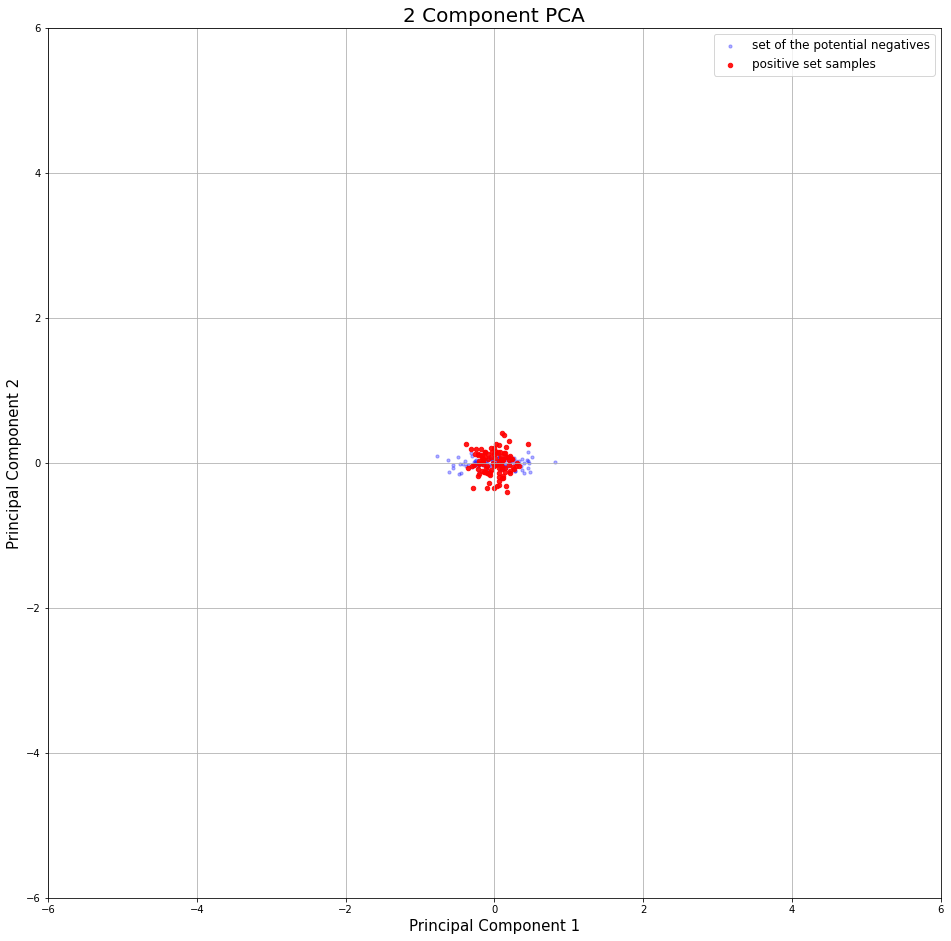

In [38]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(df_pca_negative_genes['principal component 1']
                    , df_pca_negative_genes['principal component 2']
                    , c = "b"
                    , alpha = 0.3
                    , s = 10)
ax.scatter(df_pca_host_factors['principal component 1']
                    , df_pca_host_factors['principal component 2']
                    , c = "r"
                    , alpha = 0.9
                    , s = 20)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.legend(["set of the potential negatives", "positive set samples"], fontsize = 12)
ax.grid()
plt.show()    